Original provided by the author in GitHub: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb
from the exceptional book: _Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299_

Let’s try to build a classifier to detect the Iris-__Virginica__ type based on all features.

In [2]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# take a look at the data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# getting the feature arrays
sepal_length = iris["data"][:, 0:1]
sepal_width = iris["data"][:, 1:2]
petal_length = iris["data"][:, 2:3]
petal_width = iris["data"][:, 3:]  
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0

We now train the logistic regression models:

In [6]:
log_reg_sepal_length = LogisticRegression()
log_reg_sepal_length.fit(sepal_length, y)
log_reg_sepal_width = LogisticRegression()
log_reg_sepal_width.fit(sepal_width, y)
log_reg_petal_length = LogisticRegression()
log_reg_petal_length.fit(petal_length, y)
log_reg_petal_width = LogisticRegression()
log_reg_petal_width.fit(petal_width, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The following picture gives the probabilities for flowers with 
sepal length varying from 4 to 10cm,
sepal width varying from 1 to 4cm,
petal length varying from 1 to 7cm,
petal width varying from 0 to 3cm

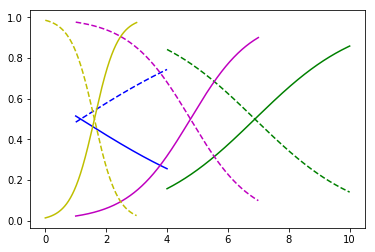

In [7]:
sepal_length_new = np.linspace(4, 10, 1000).reshape(-1, 1)
sepal_length_proba = log_reg_sepal_length.predict_proba(sepal_length_new)
sepal_width_new = np.linspace(1, 4, 1000).reshape(-1, 1)
sepal_width_proba = log_reg_sepal_width.predict_proba(sepal_width_new)
petal_length_new = np.linspace(1, 7, 1000).reshape(-1, 1)
petal_length_proba = log_reg_petal_length.predict_proba(petal_length_new)
petal_width_new = np.linspace(0, 3, 1000).reshape(-1, 1)
petal_width_proba = log_reg_petal_width.predict_proba(petal_width_new)
plt.plot(sepal_length_new, sepal_length_proba[:, 1], "g-", label="Iris-Virginica sepal length")
plt.plot(sepal_length_new, sepal_length_proba[:, 0], "g--", label="Not Iris-Virginica sepal length")
plt.plot(sepal_width_new, sepal_width_proba[:, 1], "b-", label="Iris-Virginica sepal width")
plt.plot(sepal_width_new, sepal_width_proba[:, 0], "b--", label="Not Iris-Virginica sepal width")
plt.plot(petal_length_new, petal_length_proba[:, 1], "m-", label="Iris-Virginica petal length")
plt.plot(petal_length_new, petal_length_proba[:, 0], "m--", label="Not Iris-Virginica petal length")
plt.plot(petal_width_new, petal_width_proba[:, 1], "y-", label="Iris-Virginica petal width")
plt.plot(petal_width_new, petal_width_proba[:, 0], "y--", label="Not Iris-Virginica petal width")

The values of the unknown iris are 4.8,2.5,5.3,2.4
According to the graphic from the sepal length with 4.8 it is an Iris-Virginica with a probability of aproximatly 25% and from petal length with 5.3 there is aproximatly 55% probability and from petal width with 2.4 there is aproximatly 90% probability of being an Iris-Virginica. The sepal width diagram is unclear so I decide to take a deeper look on the values

In [8]:
X = iris["data"][:, 1:2]
y = (iris["target"] == 2).astype(np.int) 

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

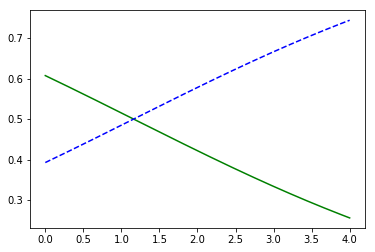

In [10]:
X_new = np.linspace(0, 4, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

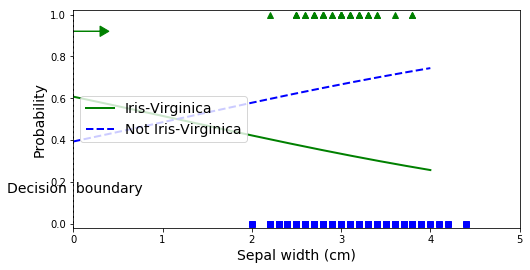

In [11]:
X_new  ==  np.linspace(0, 4, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 5, -0.02, 1.02])
plt.show()

As we can see the sepal width is not an usefull value for logistic regression because the values are nearly in the same range. That means a flower with 2.5 cm sepal width has 50% probability to be a "Iris Verginica" If we look at all values in common I think there is a high probability that it is an Iris Virginica but it's not sure.

Now I want to make the logistic regression on the whole data set and make prediction for the unknown iris

In [19]:
X = iris["data"]  
y = (iris["target"] == 2).astype(np.int)  

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
X_new = np.array([4.8,2.5,5.3,2.4]).reshape(1, -1)  # reshape(1, -1) if it contains a single sample.
y_proba = log_reg.predict(X_new)
y_proba

array([1])

The prediction is also an Iris Verginica.